# Icosahedral meth utils

In [1]:
%run review/__common.py
%load_ext autoreload
%autoreload 2

[W1223 15:53:13.144727225 Utils.hpp:135] Warning: Environment variable NCCL_ASYNC_ERROR_HANDLING is deprecated; use TORCH_NCCL_ASYNC_ERROR_HANDLING instead (function operator())


In [3]:
# https://vscode.dev/github/NVIDIA/modulus/blob/main/modulus/utils/graphcast/icosahedral_mesh.py#L26
from modulus.utils.graphcast.icosahedral_mesh import TriangularMesh

## get_icosahedron()

Function defined in [1].

```python
    """Returns a sequence of meshes, each with triangularization sphere.

    Starting with a regular icosahedron (12 vertices, 20 faces, 30 edges) with
    circumscribed unit sphere. Then, each triangular face is iteratively
    subdivided into 4 triangular faces `splits` times. The new vertices are then
    projected back onto the unit sphere. All resulting meshes are returned in a
    list, from lowest to highest resolution.

    The vertices in each face are specified in counter-clockwise order as
    observed from the outside the icosahedron.
    """
```

- [1] https://vscode.dev/github/NVIDIA/modulus/blob/main/modulus/utils/graphcast/icosahedral_mesh.py#L94

In [16]:
phi = (1 + np.sqrt(5)) / 2

vertices = []
for c1 in [1.0, -1.0]:
    for c2 in [phi, -phi]:
        vertices.append((c1, c2, 0.0))
        vertices.append((0.0, c1, c2))
        vertices.append((c2, 0.0, c1))

vertices = np.array(vertices, dtype=np.float32)
vertices /= np.linalg.norm([1.0, phi])

vertices.shape, vertices, np.linalg.norm(vertices, axis=1)

((12, 3),
 array([[ 0.5257311,  0.8506508,  0.       ],
        [ 0.       ,  0.5257311,  0.8506508],
        [ 0.8506508,  0.       ,  0.5257311],
        [ 0.5257311, -0.8506508,  0.       ],
        [ 0.       ,  0.5257311, -0.8506508],
        [-0.8506508,  0.       ,  0.5257311],
        [-0.5257311,  0.8506508,  0.       ],
        [ 0.       , -0.5257311,  0.8506508],
        [ 0.8506508,  0.       , -0.5257311],
        [-0.5257311, -0.8506508,  0.       ],
        [ 0.       , -0.5257311, -0.8506508],
        [-0.8506508,  0.       , -0.5257311]], dtype=float32),
 array([0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
        0.99999994, 0.99999994, 0.99999994, 0.99999994, 0.99999994,
        0.99999994, 0.99999994], dtype=float32))

**Comment:** 12 vertices in 3D space, normalised. When they are float64, the magnitude is 1.

**Question**: How do they look in space?

In [8]:
def plot_icosahedron(mesh: TriangularMesh):
    vertices = mesh.vertices
    faces = mesh.faces
    
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111, projection='3d')

    x = vertices[:, 0]
    y = vertices[:, 1]
    z = vertices[:, 2]
    ax.scatter(x, y, z, c='r', marker='o')
    ax.scatter(0, 0, 0, c='black', marker='o') # center
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    # Determine axis ranges
    max_range = np.array([x.max() - x.min(), y.max() - y.min(), z.max() - z.min()]).max() / 2.0
    center_x = (x.max() + x.min()) / 2.0
    center_y = (y.max() + y.min()) / 2.0
    center_z = (z.max() + z.min()) / 2.0

    # Add thin X, Y, Z axis lines
    ax.plot([center_x - max_range, center_x + max_range], [center_y, center_y], [center_z, center_z], color='blue', linewidth=0.5, label='X-axis')
    ax.plot([center_x, center_x], [center_y - max_range, center_y + max_range], [center_z, center_z], color='green', linewidth=0.5, label='Y-axis')
    ax.plot([center_x, center_x], [center_y, center_y], [center_z - max_range, center_z + max_range], color='red', linewidth=0.5, label='Z-axis')

    # Add small arrows at the end of each axis
    arrow_length = max_range * 0.1  # Length of the arrow
    ax.quiver(center_x + max_range, center_y, center_z, arrow_length, 0, 0, color='blue', linewidth=1)
    ax.quiver(center_x, center_y + max_range, center_z, 0, arrow_length, 0, color='green', linewidth=1)
    ax.quiver(center_x, center_y, center_z + max_range, 0, 0, arrow_length, color='red', linewidth=1)

    # Plot edges
    for face in faces:
        face = list(face)
        face += [face[0]]
        coords = vertices[face]
        x = coords[:, 0]
        y = coords[:, 1]
        z = coords[:, 2]
        ax.plot3D(x, y, z, color='gray', linewidth=0.5)

    # Plot sphere
    # Make data
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, alpha=0.1, edgecolor='none')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.set_aspect('equal')
    ax.legend()
    plt.show()

In [17]:
faces = [
    (0, 1, 2),
    (0, 6, 1),
    (8, 0, 2),
    (8, 4, 0),
    (3, 8, 2),
    (3, 2, 7),
    (7, 2, 1),
    (0, 4, 6),
    (4, 11, 6),
    (6, 11, 5),
    (1, 5, 7),
    (4, 10, 11),
    (4, 8, 10),
    (10, 8, 3),
    (10, 3, 9),
    (11, 10, 9),
    (11, 9, 5),
    (5, 9, 7),
    (9, 3, 7),
]

from scipy.spatial import transform

angle_between_faces = 2 * np.arcsin(phi / np.sqrt(3))
rotation_angle = (np.pi - angle_between_faces) / 2
rotation = transform.Rotation.from_euler(seq="y", angles=rotation_angle)
rotation_matrix = rotation.as_matrix()
rotated_vertices = np.dot(vertices, rotation_matrix)

mesh_initial = TriangularMesh(vertices=vertices.astype(np.float32), faces=np.array(faces, dtype=np.int32))
mesh_rotated = TriangularMesh(vertices=rotated_vertices.astype(np.float32), faces=np.array(faces, dtype=np.int32))

rotated_vertices.shape, rotated_vertices, np.linalg.norm(rotated_vertices, axis=1)

((12, 3),
 array([[ 0.49112345,  0.85065079,  0.18759247],
        [-0.30353099,  0.52573109,  0.79465445],
        [ 0.60706199,  0.        ,  0.79465444],
        [ 0.49112345, -0.85065079,  0.18759247],
        [ 0.30353099,  0.52573109, -0.79465445],
        [-0.98224692,  0.        ,  0.18759246],
        [-0.49112345,  0.85065079, -0.18759247],
        [-0.30353099, -0.52573109,  0.79465445],
        [ 0.98224692,  0.        , -0.18759246],
        [-0.49112345, -0.85065079, -0.18759247],
        [ 0.30353099, -0.52573109, -0.79465445],
        [-0.60706199,  0.        , -0.79465444]]),
 array([0.99999997, 0.99999997, 0.99999997, 0.99999997, 0.99999997,
        0.99999997, 0.99999997, 0.99999997, 0.99999997, 0.99999997,
        0.99999997, 0.99999997]))

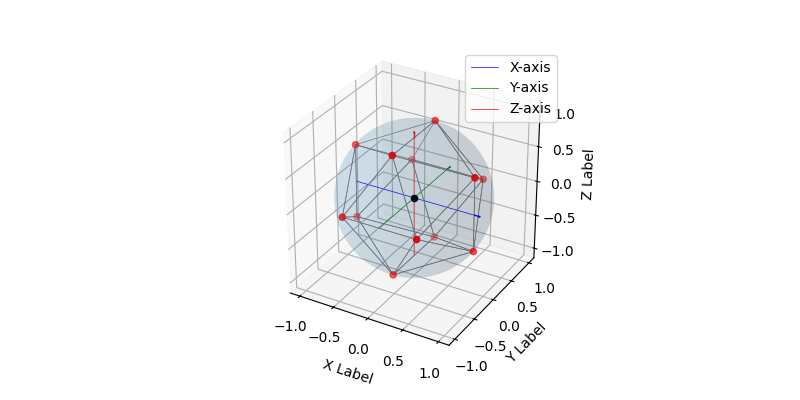

In [13]:
%matplotlib widget
plot_icosahedron(mesh_initial)

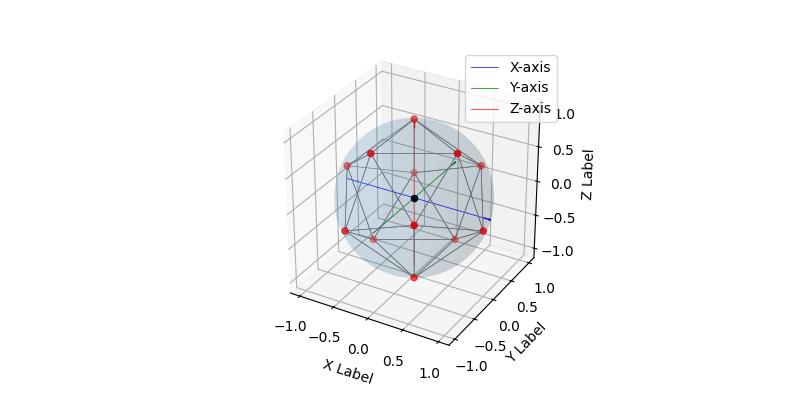

In [15]:
%matplotlib widget
plot_icosahedron(mesh_rotated)

**Comment 1:** The rotation is needed to make the Z intersect in the middle of a face, and not on a vertex.

**Comment 2:** The `get_icosahedron()` function returns the base structure.

## get_hierarchy_of_triangular_meshes_for_sphere()

Function defined in [1].

```python
    """Returns a sequence of meshes, each with triangularization sphere.

    Starting with a regular icosahedron (12 vertices, 20 faces, 30 edges) with
    circumscribed unit sphere. Then, each triangular face is iteratively
    subdivided into 4 triangular faces `splits` times. The new vertices are then
    projected back onto the unit sphere. All resulting meshes are returned in a
    list, from lowest to highest resolution.

    The vertices in each face are specified in counter-clockwise order as
    observed from the outside the icosahedron.
    """
```

```py
def get_hierarchy_of_triangular_meshes_for_sphere(splits: int) -> List[TriangularMesh]:
    current_mesh = get_icosahedron()
    output_meshes = [current_mesh]
    for _ in range(splits):
        current_mesh = _two_split_unit_sphere_triangle_faces(current_mesh)
        output_meshes.append(current_mesh)
    return output_meshes
```

**Comment:** As per code above, the icosahedron gets increasignly refined (w.r.t. "edges split") and a list is produced with increasingly but distinct refined icosahedrons. This relies on `_two_split_unit_sphere_triangle_faces(...)` which loops through the faces, splitting edges in two and adding for each a new vertex right in the middle (and normalising it back 1, so to have it on the sphere surface). This also produces a new list of faces, which is returned.

- [1] https://vscode.dev/github/NVIDIA/modulus/blob/main/modulus/utils/graphcast/icosahedral_mesh.py#L63

In [13]:
from modulus.utils.graphcast.icosahedral_mesh import get_hierarchy_of_triangular_meshes_for_sphere

_meshes = get_hierarchy_of_triangular_meshes_for_sphere(splits=2)

len(_meshes), \
    "Vertices:", _meshes[0].vertices.shape, _meshes[0].vertices.dtype, "Faces;", _meshes[0].faces.shape, _meshes[0].faces.dtype,\
    "Vertices:", _meshes[-1].vertices.shape, "Faces:", _meshes[-1].faces.shape

(3,
 'Vertices:',
 (12, 3),
 dtype('float32'),
 'Faces;',
 (20, 3),
 dtype('int32'),
 'Vertices:',
 (162, 3),
 'Faces:',
 (320, 3))

## faces_to_edges

Function defined in [1].

```python
    """Transforms polygonal faces to sender and receiver indices.

   It does so by transforming every face into N_i edges. Such if the triangular
   face has indices [0, 1, 2], three edges are added 0->1, 1->2, and 2->0.

   If all faces have consistent orientation, and the surface represented by the
   faces is closed, then every edge in a polygon with a certain orientation
   is also part of another polygon with the opposite orientation. In this
   situation, the edges returned by the method are always bidirectional.
    """
```

**Comment:** Each vertes should "touch" exactly 5 faces.

- [1] https://vscode.dev/github/NVIDIA/modulus/blob/main/modulus/utils/graphcast/icosahedral_mesh.py#L272

In [22]:
faces = _meshes[0].faces

for i, (ind1, ind2, ind3) in enumerate(faces):
    print(f"Face {i:2}:  {ind1:2}  {ind2:2}  {ind3:2}")


Face  0:   0   1   2
Face  1:   0   6   1
Face  2:   8   0   2
Face  3:   8   4   0
Face  4:   3   8   2
Face  5:   3   2   7
Face  6:   7   2   1
Face  7:   0   4   6
Face  8:   4  11   6
Face  9:   6  11   5
Face 10:   1   5   7
Face 11:   4  10  11
Face 12:   4   8  10
Face 13:  10   8   3
Face 14:  10   3   9
Face 15:  11  10   9
Face 16:  11   9   5
Face 17:   5   9   7
Face 18:   9   3   7
Face 19:   1   6   5


In [25]:
faces[:, 0], faces[:, 1]

(array([ 0,  0,  8,  8,  3,  3,  7,  0,  4,  6,  1,  4,  4, 10, 10, 11, 11,
         5,  9,  1], dtype=int32),
 array([ 1,  6,  0,  4,  8,  2,  2,  4, 11, 11,  5, 10,  8,  8,  3, 10,  9,
         9,  3,  6], dtype=int32))

In [30]:
np.concatenate([faces[:, 0], faces[:, 1]])

array([ 0,  0,  8,  8,  3,  3,  7,  0,  4,  6,  1,  4,  4, 10, 10, 11, 11,
        5,  9,  1,  1,  6,  0,  4,  8,  2,  2,  4, 11, 11,  5, 10,  8,  8,
        3, 10,  9,  9,  3,  6], dtype=int32)

**Comment:** Given a list of faces, it extract a list of senders and receivers.

## merge_meshes()

Defined in [1] with:

```python
    """Transforms polygonal faces to sender and receiver indices.

    It does so by transforming every face into N_i edges. Such if the triangular
    face has indices [0, 1, 2], three edges are added 0->1, 1->2, and 2->0.

    If all faces have consistent orientation, and the surface represented by the
    faces is closed, then every edge in a polygon with a certain orientation
    is also part of another polygon with the opposite orientation. In this
    situation, the edges returned by the method are always bidirectional.
    """
```

- [1] https://github.com/NVIDIA/modulus/blob/main/modulus/utils/graphcast/icosahedral_mesh.py#L272

In [42]:
import itertools

print(len(_meshes))

for mesh_i, mesh_ip1 in itertools.pairwise(_meshes):
    print(mesh_i.vertices.shape, mesh_i.faces.shape, mesh_ip1.vertices.shape, mesh_ip1.faces.shape)

3
(12, 3) (20, 3) (42, 3) (80, 3)
(42, 3) (80, 3) (162, 3) (320, 3)


**Comment:** Returns a new TriangularMesh composed of the vertices of the finest one, and a merge of all faces.